In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv(("C:/Users/lizab/Downloads/Book1.csv"))
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,https://www.airbnb.com/rooms/41339,20230612205726,6/13/2023,city scrape,Rental unit in Porto Â· â˜…4.70 Â· 1 bedroom Â...,Welcome to our apartment located near the sea ...,In the surrounds you have Serralves Museum and...,https://a0.muscache.com/pictures/25727334/9578...,180050,...,4.80,4.55,4.65,29049/AL,f,1,1,0,0,0.16
1,411572,https://www.airbnb.com/rooms/411572,20230612205726,6/13/2023,city scrape,Tiny home in Vila Nova de Gaia Â· â˜…5.0 Â· 2 ...,"Ideal space for a brief sunny, relaxing experi...",NaN,https://a0.muscache.com/pictures/5281910/c42fa...,2048592,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.03
2,55111,https://www.airbnb.com/rooms/55111,20230612205726,6/13/2023,previous scrape,Rental unit in Paredes Municipality Â· â˜…4.80...,Is the first floor in a villa with shared pool...,NaN,https://a0.muscache.com/pictures/b3c38006-5fdf...,259711,...,4.87,4.79,4.79,7563/AL,f,3,3,0,0,0.16
3,424705,https://www.airbnb.com/rooms/424705,20230612205726,6/13/2023,city scrape,Rental unit in Porto Â· â˜…4.86 Â· 2 bedrooms ...,Shining view in the city heart 5<br /><br /><b...,NaN,https://a0.muscache.com/pictures/2c556dfb-0ed6...,1630185,...,4.90,4.85,4.80,5929/AL,t,15,15,0,0,0.45
4,73828,https://www.airbnb.com/rooms/73828,20230612205726,6/13/2023,previous scrape,Rental unit in EstaÃ§Ã£o Â· â˜…4.83 Â· 2 bedro...,Ground floor in a villa with shared pool and p...,NaN,https://a0.muscache.com/pictures/ffb19299-425c...,259711,...,5.00,4.92,4.75,7563/AL,f,3,3,0,0,0.12


In [4]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.990000e+02,4.990000e+02,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.000000,0.0,394.000000,...,482.000000,482.000000,482.000000,482.000000,482.000000,499.00000,499.000000,499.000000,499.000000,483.000000
mean,2.193451e+06,2.023061e+13,1.433096e+07,13.094188,19.509018,41.140760,-8.604669,4.150301,NaN,1.842640,...,4.764564,4.841888,4.844834,4.728257,4.688589,8.06012,7.364729,0.635271,0.052104,1.465652
std,1.464409e+06,0.000000e+00,4.149953e+07,52.435514,116.544670,0.073614,0.070794,2.394659,NaN,1.053582,...,0.239022,0.241484,0.246295,0.261479,0.284524,16.04200,15.924245,1.652319,0.479804,1.507500
min,4.133900e+04,2.023061e+13,1.800500e+05,1.000000,1.000000,40.818890,-8.774280,1.000000,NaN,1.000000,...,3.000000,1.000000,1.000000,3.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.010000
25%,7.670380e+05,2.023061e+13,2.514783e+06,2.000000,2.000000,41.141995,-8.618315,2.000000,NaN,1.000000,...,4.670000,4.810000,4.802500,4.610000,4.630000,1.00000,1.000000,0.000000,0.000000,0.260000
50%,1.963785e+06,2.023061e+13,5.632244e+06,4.000000,6.000000,41.147160,-8.613330,4.000000,NaN,2.000000,...,4.820000,4.880000,4.890000,4.815000,4.730000,4.00000,2.000000,0.000000,0.000000,0.930000
75%,3.569744e+06,2.023061e+13,1.490189e+07,9.000000,11.000000,41.153365,-8.605955,5.000000,NaN,2.000000,...,4.920000,4.950000,4.950000,4.907500,4.830000,7.50000,7.000000,0.000000,0.000000,2.300000
max,4.862493e+06,2.023061e+13,4.021913e+08,695.000000,1751.000000,41.409310,-8.164200,16.000000,NaN,7.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,206.00000,197.000000,10.000000,6.000000,7.180000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            499 non-null    int64  
 1   listing_url                                   499 non-null    object 
 2   scrape_id                                     499 non-null    int64  
 3   last_scraped                                  499 non-null    object 
 4   source                                        499 non-null    object 
 5   name                                          499 non-null    object 
 6   description                                   498 non-null    object 
 7   neighborhood_overview                         316 non-null    object 
 8   picture_url                                   499 non-null    object 
 9   host_id                                       499 non-null    int

In [6]:
data.isnull().sum()

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               16
Length: 75, dtype: int64

In [31]:
data=data.fillna(0)

In [32]:
data.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
Length: 74, dtype: int64

In [35]:
data.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
Length: 74, dtype: int64

<AxesSubplot:title={'center':'Airbnb Price Distribution Plot'}, xlabel='price', ylabel='Count'>

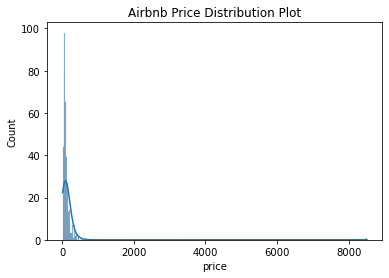

In [37]:
plt.title('Airbnb Price Distribution Plot')
sns.histplot(data["price"], kde=True)

In [38]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [61]:
cat=["review_scores_rating","review_scores_accuracy","review_scores_cleanliness","bedrooms","accommodates"]
for x in cat:
    encoder = LabelEncoder()
    data[x]= encoder.fit_transform(data[x])
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,41339,https://www.airbnb.com/rooms/41339,20230612205726,6/13/2023,city scrape,Rental unit in Porto Â· â˜…4.70 Â· 1 bedroom Â...,Welcome to our apartment located near the sea ...,In the surrounds you have Serralves Museum and...,https://a0.muscache.com/pictures/25727334/9578...,180050,...,4.85,4.80,40,4.65,29049/AL,f,0,1,0,0
1,411572,https://www.airbnb.com/rooms/411572,20230612205726,6/13/2023,city scrape,Tiny home in Vila Nova de Gaia Â· â˜…5.0 Â· 2 ...,"Ideal space for a brief sunny, relaxing experi...",0,https://a0.muscache.com/pictures/5281910/c42fa...,2048592,...,5.00,5.00,85,5.00,0,f,0,1,0,0
2,55111,https://www.airbnb.com/rooms/55111,20230612205726,6/13/2023,previous scrape,Rental unit in Paredes Municipality Â· â˜…4.80...,Is the first floor in a villa with shared pool...,0,https://a0.muscache.com/pictures/b3c38006-5fdf...,259711,...,4.87,4.87,64,4.79,7563/AL,f,2,3,0,0
3,424705,https://www.airbnb.com/rooms/424705,20230612205726,6/13/2023,city scrape,Rental unit in Porto Â· â˜…4.86 Â· 2 bedrooms ...,Shining view in the city heart 5<br /><br /><b...,0,https://a0.muscache.com/pictures/2c556dfb-0ed6...,1630185,...,4.92,4.90,70,4.80,5929/AL,t,14,14,0,0
4,73828,https://www.airbnb.com/rooms/73828,20230612205726,6/13/2023,previous scrape,Rental unit in EstaÃ§Ã£o Â· â˜…4.83 Â· 2 bedro...,Ground floor in a villa with shared pool and p...,0,https://a0.muscache.com/pictures/ffb19299-425c...,259711,...,5.00,5.00,77,4.75,7563/AL,f,2,3,0,0


In [98]:
target = data["price"]
training = data[["review_scores_cleanliness","review_scores_communication","review_scores_location","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","bedrooms","accommodates","beds","calculated_host_listings_count","calculated_host_listings_count_entire_homes"]]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=42)
X_train=X_train.fillna(0) 
X_test = X_test.fillna(0)
y_train=y_train.fillna(0)
y_test=y_test.fillna(0)

In [100]:
print(X_train)

     review_scores_cleanliness  review_scores_communication  \
56                          51                         4.99   
227                         65                         4.91   
280                         55                         4.69   
486                         60                         4.93   
220                         75                         0.00   
..                         ...                          ...   
106                         73                         4.99   
270                         67                         4.93   
348                         71                         4.94   
435                         74                         5.00   
102                         53                         4.88   

     review_scores_location  review_scores_rating  review_scores_accuracy  \
56                       79                    68                      51   
227                      49                    68                      63   
280         

In [101]:

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [103]:
model = LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

-0.8567427584159322


In [105]:
from sklearn.metrics import mean_squared_error, r2_score


In [106]:
mse =mean_squared_error(y_test,y_pred)
print(mse)

NameError: name 'y_pred' is not defined